### Импорт библиотек и загрузка данных

In [1]:
# Импортируем нужные нам библиотеки
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

from datetime import datetime

from itertools import combinations

from scipy.stats import ttest_ind

In [2]:
# Импортируем датасет, с которым будем в дальнейшем работать
train = pd.read_csv('D:\Data Scientist_Skill Factory\Folders with data/Unit_5/Project/From_kaggle/train.csv')

In [3]:
train_initial = train# Запоминаем первоначальный датасет

In [4]:
train

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [5]:
# Импортируем датасет test
test = pd.read_csv('D:\Data Scientist_Skill Factory\Folders with data/Unit_5/Project/From_kaggle/test.csv')

In [6]:
test

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36344,83775,31MAR2014,SCH,F,37,N,N,1,0,-1.744976,3,50,2,3,15000,4,1,N
36345,106254,25APR2014,GRD,F,64,Y,Y,0,0,-2.293781,3,60,1,2,200000,1,4,N
36346,81852,30MAR2014,GRD,M,31,N,N,2,0,-0.940752,1,50,1,2,60000,4,2,N
36347,1971,07JAN2014,UGR,F,27,N,N,1,0,-1.242392,2,80,2,3,30000,1,1,N


In [7]:
# Импортируем датасет sample_submission
sample_submission = pd.read_csv('D:\Data Scientist_Skill Factory\Folders with data/Unit_5/Project/From_kaggle/sample_submission.csv')

In [8]:
sample_submission

,client_id,default
0,66799,0.441004
1,25379,0.138092
2,28825,0.373370
3,37530,0.476501
4,4264,0.304640
...,...,...
24349,96657,0.144776
24350,65908,0.878936
24351,74542,0.830871
24352,82350,0.371539


Видим, что датасет test содержит те же столбцы, что и датасет train за исключением столбца с целевой переменной default. Столбец с целевой переменной есть в датасете train, и его нет в test. Таким образом мы можем обучить модель на выборке train и проверить ее, сравнив предсказанные значения целевой переменной с реальными. И добившись наибольшего значения ROC-AUC метрики применить модель для предсказания вероятность дефолта клиентов из выборки test.

### Функции.

In [9]:
def standartization(x): # Функция выполняет стандартизацию столбца.
    train['Center'] = 0.0
    train['Mean'] = x.mean()
        
    for i in range (0, len(x)):
        train.Center = x - train.Mean
        
    Norm = np.linalg.norm(train.Center)
    
    train['Standart'] = 0.0
    train.Standart = train.Center/Norm
        
    del train['Center']
    del train['Mean']

In [10]:
def get_stat_dif(column): # Функция проверяет есть ли статистическая разница в распределении целевой переменной для категорий.
    cols = train.loc[:, column].value_counts().index[:31]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(train.loc[train.loc[:, column] == comb[0], 'default'], 
                        train.loc[train.loc[:, column] == comb[1], 'default']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

### Выполним разведывательный анализ данных.
В датафрейме train у нас 19 столбцов и 73799 строк. Рассмотрим каждый из столбцов по отдельности, выявим наличие или отсутствие пропусков, в случае если они есть - оценим возможность их заполнения. Постараемся определить степень влияния тех или иных данных на целевую переменную default, чтобы решить какие данные стоит брать в работу, а какие нет. Подумаем, какие новые признаки можно сгенерировать.

##### Столбец client_id

In [11]:
train.client_id.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: client_id, dtype: int64

In [12]:
print(train.client_id.nunique()) # Выведем число уникальных значений.

73799


Видим, что у нас нет пропущенных значений, все 73799 строк заполнены. При этом количество уникальных значений - 73799, то есть нет повторов. Этот столбец оставим для идентификации клиента банка.

##### Столбец app_date

In [13]:
train.app_date.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: app_date, dtype: int64

Пропусков нет. Для возможности работы с этим столбцом сгенерируем на его основе новый признак - преобразуем его в количество дней прошедщих с даты подачи заявки до 18 сентября 2021-го года (день, когда я начал работу над проектом). И запишем эти значения в этот же столбец, ведь взять в модель строковые значения мы все равно не можем.

In [14]:
for i in range (0, len(train)):
    train.app_date[i] = train.app_date[i][0:2]+'-'+train.app_date[i][2:5]+'-'+train.app_date[i][5:9]
    train.app_date[i] = datetime.strptime('18-SEP-2021', '%d-%b-%Y') - datetime.strptime(train.app_date[i], '%d-%b-%Y')
    train.app_date[i] = train.app_date[i].days

train.app_date = train.app_date.apply(lambda x: float(x))

<ipython-input-14-02c4901f10e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.app_date[i] = train.app_date[i][0:2]+'-'+train.app_date[i][2:5]+'-'+train.app_date[i][5:9]
<ipython-input-14-02c4901f10e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.app_date[i] = datetime.strptime('18-SEP-2021', '%d-%b-%Y') - datetime.strptime(train.app_date[i], '%d-%b-%Y')
<ipython-input-14-02c4901f10e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Теперь посмотрим на распределение значений в этом столбце:

count    73799.000000
mean      2755.964566
std         32.121884
min       2698.000000
25%       2728.000000
50%       2755.000000
75%       2784.000000
max       2817.000000
Name: app_date, dtype: float64

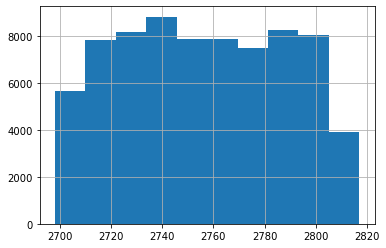

In [15]:
train.app_date.hist()
train.app_date.describe()

Выбросов нет.

##### Столбец education

In [16]:
train.education.isna().value_counts()# Оценим количество пропусков.

False    73492
True       307
Name: education, dtype: int64

Видим 307 пропущенных значений. Давайте рассмотрим признак подробнее:

SCH    38860
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64

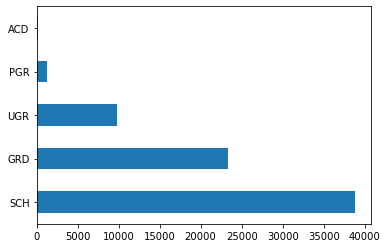

In [17]:
train['education'].value_counts().plot.barh()
train['education'].value_counts()

Для заполнения пропусков обратимся к житейской логике. Обычно образование человека коррелирует с его доходами - чем выше образование, тем выше доход. Посмотрим на доходы клиентов банка с различным уровнем образования:

count       194.000000
mean      82966.634021
std       82996.490589
min        3073.000000
25%       30000.000000
50%       60000.000000
75%      100000.000000
max      500000.000000
Name: income, dtype: float64

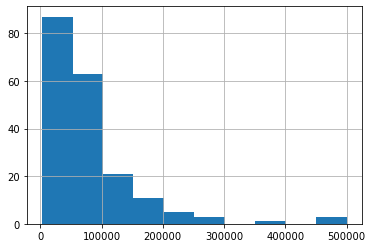

In [18]:
# Посмотрим на распределение доходов в группе клиентов банка с уровнем образования 'ACD'
train[train.education == 'ACD'].income.hist()
train[train.education == 'ACD'].income.describe()

count       1257.000000
mean       77548.206046
std        76649.747530
min         5000.000000
25%        35000.000000
50%        60000.000000
75%        90000.000000
max      1000000.000000
Name: income, dtype: float64

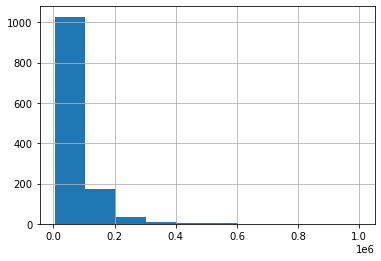

In [19]:
# Посмотрим на распределение доходов в группе клиентов банка с уровнем образования 'PGR'
train[train.education == 'PGR'].income.hist()
train[train.education == 'PGR'].income.describe()

count      23365.000000
mean       54663.948941
std        59108.701060
min         2000.000000
25%        25000.000000
50%        40000.000000
75%        60000.000000
max      1000000.000000
Name: income, dtype: float64

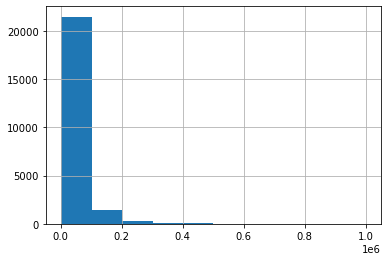

In [20]:
# Посмотрим на распределение доходов в группе клиентов банка с уровнем образования 'GRD'
train[train.education == 'GRD'].income.hist()
train[train.education == 'GRD'].income.describe()

count      9816.000000
mean      39391.796251
std       37995.676321
min        1000.000000
25%       20000.000000
50%       30000.000000
75%       45000.000000
max      950000.000000
Name: income, dtype: float64

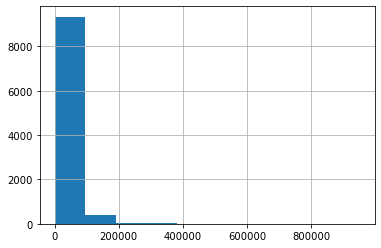

In [21]:
# Посмотрим на распределение доходов в группе клиентов банка с уровнем образования 'UGR'
train[train.education == 'UGR'].income.hist()
train[train.education == 'UGR'].income.describe()

count      38860.000000
mean       31960.275039
std        32780.593615
min         1000.000000
25%        17000.000000
50%        25000.000000
75%        38000.000000
max      1000000.000000
Name: income, dtype: float64

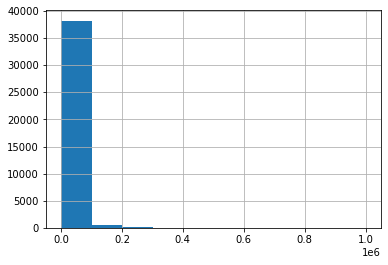

In [22]:
# Посмотрим на распределение доходов в группе клиентов банка с уровнем образования 'SCH'
train[train.education == 'SCH'].income.hist()
train[train.education == 'SCH'].income.describe()

count      73799.000000
mean       41099.775417
std        46166.322400
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64

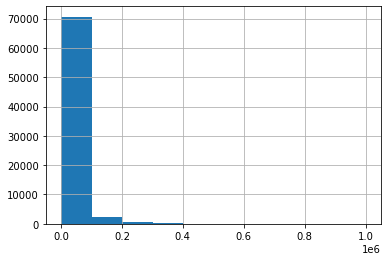

In [23]:
# Посмотрим на распределение доходов среди всех клиентов банка вне зависимости от образования.
train.income.hist()
train.income.describe()

Половина клиентов с уровнем образования SCH имеет доход в диапазоне 17000-38000 (медианный доход 25000), GRD - 25000-60000 (40000), UGR - 20000-45000 (30000), PGR - 35000-90000 (60000), ACD - 30000-100000 (60000). Заполняя пропущенные значения в столбце train.education будем смотреть на доход клиента. Если доход в диапазоне 1000-27500 будем писать уровень образования SCH, если 27501-35000 - UGR, если 35001-50000 - GRD, а если 50001-1000000 то PGR. Оценить по уровню дохода образование клиентов для групп с уровнем образования PGR и ACD не представляется возможным, так как у клиентов этих групп одинаковый медианный доход и похожее распределение. Но поскольку клиентов с уровнем образования PGR 1257, а с уровнем образовани ACD 194 (в шесть с половиной раз меньше!!!), то сделаем допущение, что все клиенты с неизвестным уровнем образования и доходом выше 50000 (в диапазоне 50001-1000000) имеют уровень образования PGR.

In [24]:
train.education = train.education.fillna(0)# Заполним пропуски в столбце education нулями.

In [25]:
for i in range (0, len(train)):
    if train.education[i] == 0:
        if 1000<train.income[i]<27500:
            train.education[i] = 'SCH'
        elif 27501<train.income[i]<35000:
            train.education[i] = 'UGR'
        elif 35001<train.income[i]<50000:
            train.education[i] = 'GRD'
        else:
            train.education[i] = 'PGR'
    else:
        train.education[i] = train.education[i]

<ipython-input-25-84459a89c65a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.education[i] = train.education[i]
<ipython-input-25-84459a89c65a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.education[i] = 'SCH'
<ipython-input-25-84459a89c65a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.education[i] = 'UGR'
<ipython-input-25-84459a89c65a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [26]:
train.education.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: education, dtype: int64

Построим boxplot для групп клиентов банка с различным уровнем образования, и значением дефолта для каждой группы.

<AxesSubplot:xlabel='education', ylabel='default'>

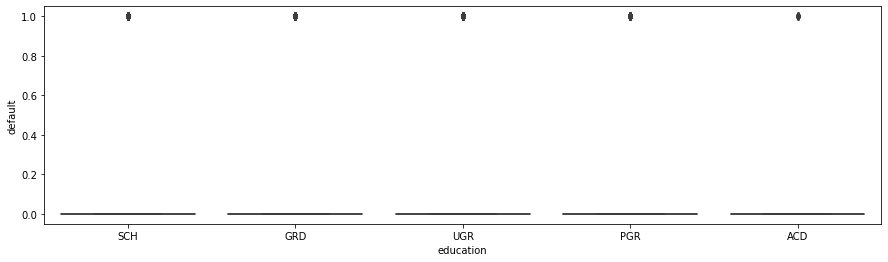

In [27]:
fig, axes = plt.subplots(1, 1, figsize = (15, 4))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = "education", y = "default", data = train, showfliers = True )

    Из получившихся боксплотов становится понятно, что случаи дефолта имели место среди клиентов со всеми уровнями образования.
    Проверим, есть ли статистическая разница в распределении случаев дефолта по группам клиентов банка с разным уровнем образования, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения дефолта случаев по различным группам клиентов неразличимы:

In [28]:
for col in ['education']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки education


Раз есть статистически значимые различия в зависимости от уровня образования, то берем этот признак в работу. А для удобства дальнейшей работы с ним выразим уровень образования клиентов через dummy-переменные с помощью метода get-dummies.

In [29]:
dummies_education  = pd.get_dummies(train.education)

dummies_education['client_id'] = train.client_id # создаем столбец client_id

# объединим датафрейм dummies_education с датафреймом train

train = dummies_education.merge(train, on = 'client_id', how = 'right')
del train['education']# Удаляем столбец education, так как образование клиента теперь выражено через dummy переменные. 

In [30]:
train

,ACD,GRD,PGR,SCH,UGR,client_id,app_date,sex,age,car,...,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,0,0,0,1,0,25905,2786.0,M,62,Y,...,-2.008753,1,50,1,2,18000,4,1,N,0
1,0,0,0,1,0,63161,2747.0,F,59,N,...,-1.532276,3,50,2,3,19000,4,1,N,0
2,0,0,0,1,0,25887,2786.0,M,25,Y,...,-1.408142,1,80,1,2,30000,1,4,Y,0
3,0,0,0,1,0,16222,2795.0,F,53,N,...,-2.057471,2,50,2,3,10000,1,3,N,0
4,0,1,0,0,0,101655,2710.0,M,48,N,...,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,0,1,0,0,0,54887,2755.0,F,45,N,...,-1.792064,3,50,1,2,17000,4,4,N,0
73795,0,0,0,1,0,76821,2735.0,M,41,Y,...,-2.058029,1,50,2,2,70000,1,4,N,0
73796,0,0,0,1,0,103695,2706.0,M,31,N,...,-1.512635,4,80,2,3,45000,2,2,N,0
73797,0,0,0,1,0,861,2814.0,F,29,N,...,-1.479334,3,50,1,3,13000,2,3,N,1


##### Столбец sex

In [31]:
train.sex.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: sex, dtype: int64

Пропусков в  этом столбце нет. Теперь построим boxplot для клиентов банка мужчин и женщин, и значением дефолта для каждой группы.

<AxesSubplot:xlabel='sex', ylabel='default'>

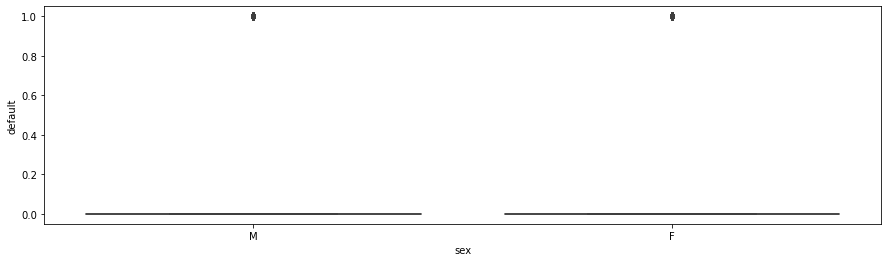

In [32]:
fig, axes = plt.subplots(1, 1, figsize = (15, 4))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = "sex", y = "default", data = train, showfliers = True )

Из получившихся боксплотов становится понятно, что случаи дефолта имели место как среди клиентов-мужчин, так и среди клиентов-женщин.
Проверим, есть ли статистическая разница в распределении случаев дефолта по мужчинам и женщинам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения случаев дефолта по мужчинам и женщинам неразличимы:

In [33]:
for col in ['sex']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex


Раз есть статистически значимые различия в зависимости от пола, то берем этот признак в работу. А для удобства дальнейшей работы с ним присвоим бинарным значениям числовые.

In [34]:
# Создадим словарь sex_dict куда запишим цифровые коды, соответствующие M (1) и F (0):
sex_dict = {"sex": {'M': 1, 'F': 0}}# Создали словарь
train = train.replace(sex_dict)# Заменили в столбце sex ,бинарные значения числовыми.

In [35]:
train

,ACD,GRD,PGR,SCH,UGR,client_id,app_date,sex,age,car,...,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,0,0,0,1,0,25905,2786.0,1,62,Y,...,-2.008753,1,50,1,2,18000,4,1,N,0
1,0,0,0,1,0,63161,2747.0,0,59,N,...,-1.532276,3,50,2,3,19000,4,1,N,0
2,0,0,0,1,0,25887,2786.0,1,25,Y,...,-1.408142,1,80,1,2,30000,1,4,Y,0
3,0,0,0,1,0,16222,2795.0,0,53,N,...,-2.057471,2,50,2,3,10000,1,3,N,0
4,0,1,0,0,0,101655,2710.0,1,48,N,...,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,0,1,0,0,0,54887,2755.0,0,45,N,...,-1.792064,3,50,1,2,17000,4,4,N,0
73795,0,0,0,1,0,76821,2735.0,1,41,Y,...,-2.058029,1,50,2,2,70000,1,4,N,0
73796,0,0,0,1,0,103695,2706.0,1,31,N,...,-1.512635,4,80,2,3,45000,2,2,N,0
73797,0,0,0,1,0,861,2814.0,0,29,N,...,-1.479334,3,50,1,3,13000,2,3,N,1


##### Столбец age

In [36]:
train.age.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: age, dtype: int64

Пропусков нет.

count    73799.000000
mean        39.280641
std         11.520378
min         21.000000
25%         30.000000
50%         37.000000
75%         48.000000
max         72.000000
Name: age, dtype: float64

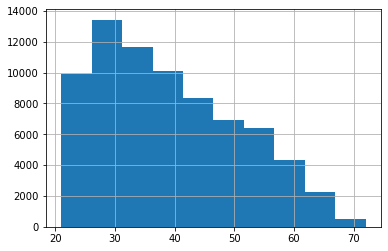

In [37]:
# Этот столбец числовой. Посмотрим на его распределение.
train.age.hist()
train.age.describe()

Выбросов нет. Заметно что больше всего берут кредиты клиенты в возрасте около тридцати лет, что вполне объяснимо тем, что в этом возрасте люди уже зарабатывают, но еще ничего не имеют. 

##### Столбец car.

In [38]:
train.car.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: car, dtype: int64

Пропусков в этом столбце нет. Теперь построим boxplot для клиентов банка с машинами и безлошадных, и значением дефолта для каждой группы.

<AxesSubplot:xlabel='car', ylabel='default'>

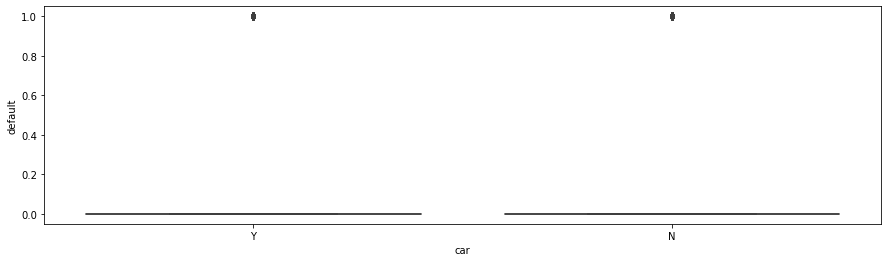

In [39]:
fig, axes = plt.subplots(1, 1, figsize = (15, 4))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = "car", y = "default", data = train, showfliers = True )

Из получившихся боксплотов становится понятно, что случаи дефолта имели место как среди клиентов автолюбителей, так и среди безлошадных. Проверим, есть ли статистическая разница в распределении случаев дефолта между этими двумя группами клиентов, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения случаев дефолта по автолюбителям и безлошадным неразличимы:

In [40]:
for col in ['car']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки car


Раз есть статистически значимые различия в зависимости от наличия машины, то берем этот признак в работу. А для удобства дальнейшей работы с ним присвоим бинарным значениям числовые.

In [41]:
# Создадим словарь car_dict куда запишим цифровые коды, соответствующие Y (1) и N (0):
car_dict = {"car": {'Y': 1, 'N': 0}}# Создали словарь
train = train.replace(car_dict)# Заменили в столбце car ,бинарные значения числовыми.

##### Столбец car_type

In [42]:
train.car_type.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: car_type, dtype: int64

Пропусков в этом столбце нет. Теперь построим boxplot для клиентов банка с иномарками и без иномарок, и значением дефолта для каждой группы.

<AxesSubplot:xlabel='car_type', ylabel='default'>

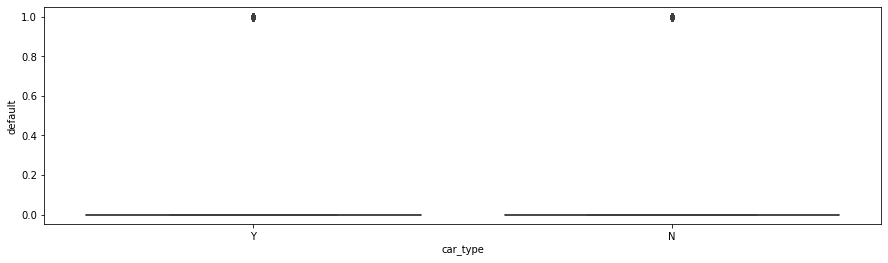

In [43]:
fig, axes = plt.subplots(1, 1, figsize = (15, 4))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = "car_type", y = "default", data = train, showfliers = True )

Из получившихся боксплотов становится понятно, что случаи дефолта имели место как среди клиентов c иномарками, так и среди клиентов без иномарок. Проверим, есть ли статистическая разница в распределении случаев дефолта между этими двумя группами клиентов, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения случаев дефолта по владельцам иномарок и всем остальным неразличимы:

In [44]:
for col in ['car_type']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки car_type


Раз есть статистически значимые различия в зависимости от наличия иномарки, то берем этот признак в работу. А для удобства дальнейшей работы с ним присвоим бинарным значениям числовые.

In [45]:
# Создадим словарь car_type_dict куда запишим цифровые коды, соответствующие Y (1) и N (0):
car_type_dict = {"car_type": {'Y': 1, 'N': 0}}# Создали словарь
train = train.replace(car_type_dict)# Заменили в столбце car_type ,бинарные значения числовыми.

##### Столбец decline_app_cnt.

In [46]:
train.decline_app_cnt.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: decline_app_cnt, dtype: int64

Пропусков нет. Этот столбец числовой - посмотрим на его распределение.

count    73799.000000
mean         0.275749
std          0.804272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: decline_app_cnt, dtype: float64

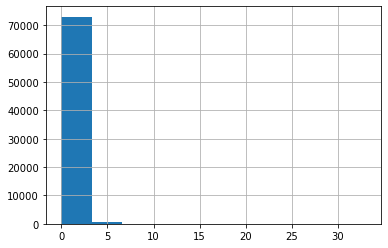

In [47]:
train.decline_app_cnt.hist()
train.decline_app_cnt.describe()

Здесь очевидно неравномерное распределение. Изучим вопрос подробнее.

In [48]:
train.decline_app_cnt.value_counts()

0     61214
1      8397
2      2468
3       903
4       414
5       165
6       113
7        48
9        24
8        19
10       11
11        9
13        3
12        2
14        2
16        2
24        1
15        1
19        1
22        1
33        1
Name: decline_app_cnt, dtype: int64

Есть очевидные выбросы (например 33 отклоненных заявки). Но если мы удалим строки с выбросами, то пропадет полезная информация, содержащаяся в других столбцах. При этом возможно по данным корреляционного анализа мы не будем брать этот столбец в работу. Повременим с удалением.

##### Столбец good_work.

In [49]:
train.good_work.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: good_work, dtype: int64

Пропусков в этом столбце нет. Теперь построим boxplot для клиентов банка с хорошей работой и без, и значением дефолта для каждой группы.

<AxesSubplot:xlabel='good_work', ylabel='default'>

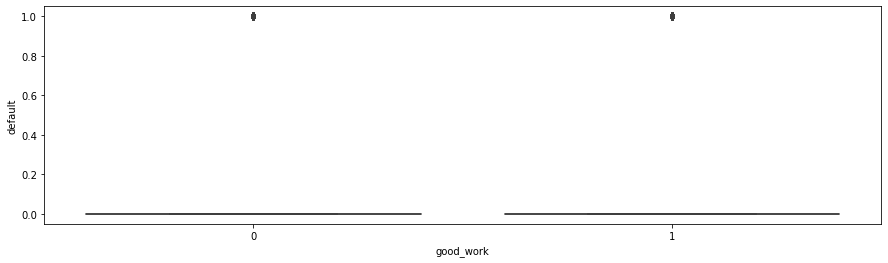

In [50]:
fig, axes = plt.subplots(1, 1, figsize = (15, 4))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = "good_work", y = "default", data = train, showfliers = True )

Из получившихся боксплотов становится понятно, что случаи дефолта имели место как среди клиентов c хорошей работой, так и среди клиентов без таковой. Проверим, есть ли статистическая разница в распределении случаев дефолта между этими двумя группами клиентов, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения случаев дефолта по клиентам в зависимости от наличия хорошей работы неразличимы:

In [51]:
for col in ['good_work']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки good_work


Раз есть статистически значимые различия в зависимости от наличия xорошей работы, то берем этот признак в работу. Менять бинарные значения на числовые не нужно, так как они уже записаны в числовом виде.

##### Столбец score_bki.

In [52]:
train. score_bki.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: score_bki, dtype: int64

Пропусков нет. Этот столбец числовой - посмотрим на его распределение.

count    73799.000000
mean        -1.904724
std          0.498231
min         -3.624586
25%         -2.259534
50%         -1.920823
75%         -1.569831
max          0.199773
Name: score_bki, dtype: float64

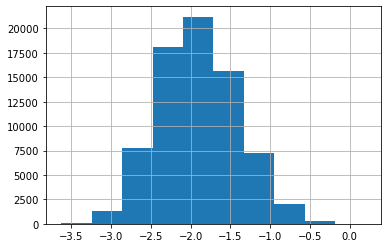

In [53]:
train.score_bki.hist()
train.score_bki.describe()

Выбросов нет. Распределен нормально.

##### Столбец bki_request_cnt.

In [54]:
train.bki_request_cnt.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: bki_request_cnt, dtype: int64

Пропусков нет. Этот столбец числовой - посмотрим на его распределение.

count    73799.000000
mean         2.000339
std          2.252073
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         53.000000
Name: bki_request_cnt, dtype: float64

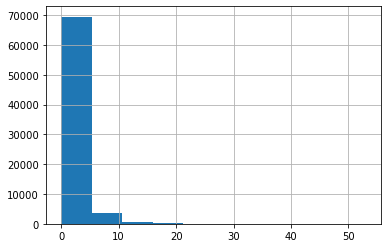

In [55]:
train.bki_request_cnt.hist()
train.bki_request_cnt.describe()

Здесь очевидно неравномерное распределение. Изучим вопрос подробнее.

In [56]:
train.bki_request_cnt.value_counts()

0     19381
1     18276
2     13749
3      9187
4      5627
5      3268
6      1704
7       852
8       508
9       299
10      225
11      188
12      144
13       94
14       86
15       54
16       35
18       22
17       19
19       18
21       12
24       11
20        9
23        7
28        4
22        4
32        2
27        2
26        2
25        2
46        1
29        1
33        1
34        1
36        1
41        1
45        1
53        1
Name: bki_request_cnt, dtype: int64

Есть очевидные выбросы (например 53 запроса в БКИ). Но если мы удалим строки с выбросами, то пропадет полезная информация, содержащаяся в других столбцах. При этом возможно по данным корреляционного анализа мы не будем брать этот столбец в работу. Повременим с удалением.

##### Столбец region_rating

In [57]:
train.region_rating.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: region_rating, dtype: int64

Пропусков нет. Этот столбец числовой - посмотрим на его распределение.

count    73799.000000
mean        56.725701
std         13.055717
min         20.000000
25%         50.000000
50%         50.000000
75%         60.000000
max         80.000000
Name: region_rating, dtype: float64

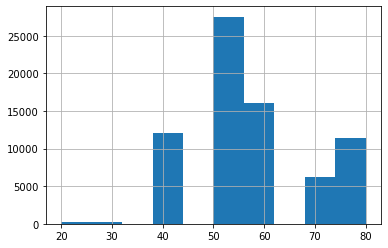

In [58]:
train.region_rating.hist()
train.region_rating.describe()

Выбросов нет. При этом очевидно распределение клиентов по четырем группам регионов с разным рейтингом.

##### Столбец home_address

In [59]:
train.home_address.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: home_address, dtype: int64

Пропусков нет.

In [60]:
train.home_address.value_counts()

2    39956
1    32585
3     1258
Name: home_address, dtype: int64

Несмотря на то что значения home_address даны в целочисленном виде (1, 2, 3), по факту это категоризаторы домашнего адреса, то есть значения не целочисленные, а категориальные. Разумно выразить их через dummy-переменные. Но поскольку категории home_addres (1, 2, 3) совпадают с категориями work_address, то чтобы у нас не получилось столбцов с одинаковыми именами, разумно эти категории переименовать (например в А, В, С) перед тем как выразить их через dummy-переменные.

In [61]:
# Создадим словарь home_address_dict куда запишим буквы, соответствующие категориям. 3 (C), 2 (B) и 1 (A):
home_address_dict = {"home_address": {3: 'C', 2: 'B', 1: 'A'}}# Создали словарь
train = train.replace(home_address_dict)# Заменили в столбце home_address категориальные коды с целочисленных на буквенные.

Перед тем как переводить в dummy-переменные построим boxplot для клиентов банка с различными категориями домашнего адреса, и значением дефолта для каждой группы.

<AxesSubplot:xlabel='home_address', ylabel='default'>

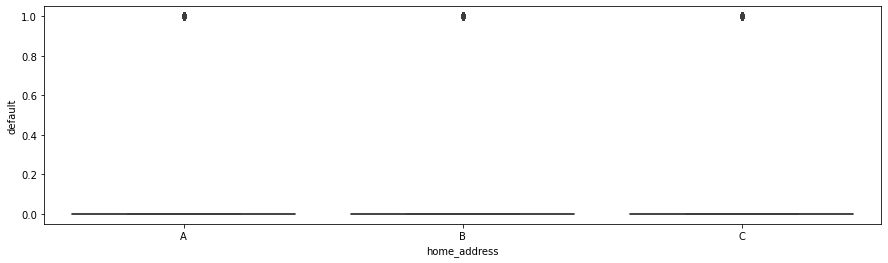

In [62]:
fig, axes = plt.subplots(1, 1, figsize = (15, 4))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = "home_address", y = "default", data = train, showfliers = True )

Из получившихся боксплотов становится понятно, что случаи дефолта имели место среди клиентов c каждой категорией домашнего адреса. Проверим, есть ли статистическая разница в распределении случаев дефолта между этими группами клиентов, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения случаев дефолта по клиентам в зависимости от категории домашнего адреса неразличимы:

In [63]:
for col in ['home_address']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки home_address


Раз есть статистически значимые различия в зависимости от категории домашнего адреса, то берем этот признак в работу. А для удобства дальнейшей работы с ним выразим категорию домашнего адреса через dummy-переменные с помощью метода get-dummies.

In [64]:
dummies_home_address  = pd.get_dummies(train.home_address)

dummies_home_address['client_id'] = train.client_id # создаем столбец client_id

# объединим датафрейм dummies_home_address с датафреймом train

train = dummies_home_address.merge(train, on = 'client_id', how = 'right')
del train['home_address']# Удаляем столбец home_address, так как категории теперь выражены через dummy переменные. 

In [65]:
train

,A,B,C,client_id,ACD,GRD,PGR,SCH,UGR,app_date,...,good_work,score_bki,bki_request_cnt,region_rating,work_address,income,sna,first_time,foreign_passport,default
0,1,0,0,25905,0,0,0,1,0,2786.0,...,0,-2.008753,1,50,2,18000,4,1,N,0
1,0,1,0,63161,0,0,0,1,0,2747.0,...,0,-1.532276,3,50,3,19000,4,1,N,0
2,1,0,0,25887,0,0,0,1,0,2786.0,...,0,-1.408142,1,80,2,30000,1,4,Y,0
3,0,1,0,16222,0,0,0,1,0,2795.0,...,0,-2.057471,2,50,3,10000,1,3,N,0
4,0,1,0,101655,0,1,0,0,0,2710.0,...,1,-1.244723,1,60,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,1,0,0,54887,0,1,0,0,0,2755.0,...,0,-1.792064,3,50,2,17000,4,4,N,0
73795,0,1,0,76821,0,0,0,1,0,2735.0,...,0,-2.058029,1,50,2,70000,1,4,N,0
73796,0,1,0,103695,0,0,0,1,0,2706.0,...,0,-1.512635,4,80,3,45000,2,2,N,0
73797,1,0,0,861,0,0,0,1,0,2814.0,...,1,-1.479334,3,50,3,13000,2,3,N,1


##### Столбец work_address.

In [66]:
train.work_address.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: work_address, dtype: int64

Пропусков нет.

In [67]:
train.work_address.value_counts()

3    44959
2    20506
1     8334
Name: work_address, dtype: int64

Несмотря на то что значения work_address даны в целочисленном виде (1, 2, 3), по факту это категоризаторы рабочего адреса, то есть значения не целочисленные, а категориальные. Разумно выразить их через dummy-переменные.Так же как и в столбце home_address переименуем эти категории (например в D, E, F) перед тем как выразить их через dummy-переменные.

In [68]:
# Создадим словарь work_address_dict куда запишим буквы, соответствующие категориям. 3 (F), 2 (E) и 1 (D):
work_address_dict = {"work_address": {3: 'F', 2: 'E', 1: 'D'}}# Создали словарь
train = train.replace(work_address_dict)# Заменили в столбце work_address категориальные коды с целочисленных на буквенные.

Перед тем как переводить в dummy-переменные построим boxplot для клиентов банка с различными категориями рабочего адреса, и значением дефолта для каждой группы.

<AxesSubplot:xlabel='work_address', ylabel='default'>

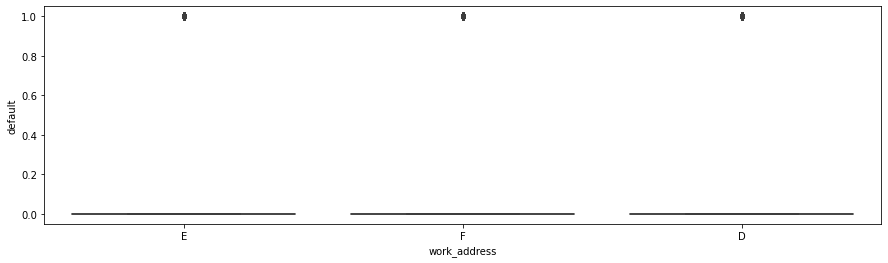

In [69]:
fig, axes = plt.subplots(1, 1, figsize = (15, 4))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = "work_address", y = "default", data = train, showfliers = True )

Из получившихся боксплотов становится понятно, что случаи дефолта имели место среди клиентов c каждой категорией рабочего адреса. Проверим, есть ли статистическая разница в распределении случаев дефолта между этими группами клиентов, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения случаев дефолта по клиентам в зависимости от категории рабочего адреса неразличимы:

In [70]:
for col in ['work_address']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки work_address


Раз есть статистически значимые различия в зависимости от категории рабочего адреса, то берем этот признак в работу. А для удобства дальнейшей работы с ним выразим категорию рабочего адреса через dummy-переменные с помощью метода get-dummies.

In [71]:
dummies_work_address  = pd.get_dummies(train.work_address)

dummies_work_address['client_id'] = train.client_id # создаем столбец client_id

# объединим датафрейм dummies_work_address с датафреймом train

train = dummies_work_address.merge(train, on = 'client_id', how = 'right')
del train['work_address']# Удаляем столбец work_address, так как категории теперь выражены через dummy переменные. 

In [72]:
train

,D,E,F,client_id,A,B,C,ACD,GRD,PGR,...,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,income,sna,first_time,foreign_passport,default
0,0,1,0,25905,1,0,0,0,0,0,...,0,0,-2.008753,1,50,18000,4,1,N,0
1,0,0,1,63161,0,1,0,0,0,0,...,0,0,-1.532276,3,50,19000,4,1,N,0
2,0,1,0,25887,1,0,0,0,0,0,...,2,0,-1.408142,1,80,30000,1,4,Y,0
3,0,0,1,16222,0,1,0,0,0,0,...,0,0,-2.057471,2,50,10000,1,3,N,0
4,0,0,1,101655,0,1,0,0,1,0,...,0,1,-1.244723,1,60,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,0,1,0,54887,1,0,0,0,1,0,...,0,0,-1.792064,3,50,17000,4,4,N,0
73795,0,1,0,76821,0,1,0,0,0,0,...,0,0,-2.058029,1,50,70000,1,4,N,0
73796,0,0,1,103695,0,1,0,0,0,0,...,0,0,-1.512635,4,80,45000,2,2,N,0
73797,0,0,1,861,1,0,0,0,0,0,...,0,1,-1.479334,3,50,13000,2,3,N,1


##### Столбец income.

In [73]:
train.income.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: income, dtype: int64

Пропусков нет. Этот столбец числовой - посмотрим на его распределение.

count      73799.000000
mean       41099.775417
std        46166.322400
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64

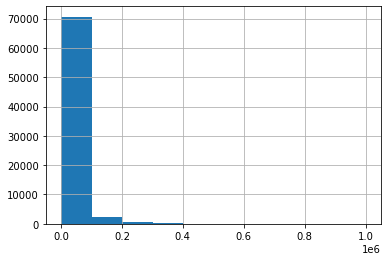

In [74]:
train.income.hist()
train.income.describe()

Очевидно, что доход распределен очень неравномерно. Однако высокие значения дохода мы не можем считать выбросами - в жизни доходы и в самом деле распределены неравномерно.

##### Столбец sna (связь заемщика с клиентами банка - категориальный признак).

In [75]:
train.sna.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: sna, dtype: int64

Пропусков нет.

In [76]:
train.sna.value_counts()

1    47301
4    11749
2    10626
3     4123
Name: sna, dtype: int64

Несмотря на то что значения sna даны в целочисленном виде (1, 2, 3, 4), по факту это категоризаторы связи заемщика с клиентами банка, то есть значения не целочисленные, а категориальные. Разумно выразить их через dummy-переменные.Так же как и в столбце home_address переименуем эти категории (например в G, H, I, J) перед тем как выразить их через dummy-переменные.

In [77]:
# Создадим словарь sna_dict куда запишим буквы, соответствующие категориям. 4 (J), 3 (I), 2 (H) и 1 (G):
sna_dict = {"sna": {4: 'J', 3: 'I', 2: 'H', 1: 'G'}}# Создали словарь
train = train.replace(sna_dict)# Заменили в столбце sna категориальные коды с целочисленных на буквенные.

Перед тем как переводить в dummy-переменные построим boxplot для заемщиков с различными категориями связи с клиентами банка, и значением дефолта для каждой группы.

<AxesSubplot:xlabel='sna', ylabel='default'>

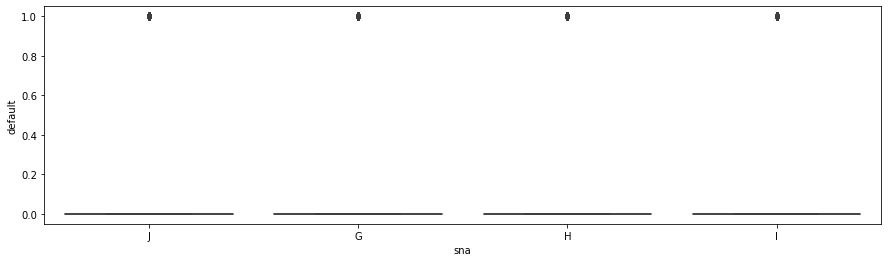

In [78]:
fig, axes = plt.subplots(1, 1, figsize = (15, 4))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = "sna", y = "default", data = train, showfliers = True )

Из получившихся боксплотов становится понятно, что случаи дефолта имели место среди заемщиков c каждой категорией связи с клиентами банка. Проверим, есть ли статистическая разница в распределении случаев дефолта между этими группами заемщиков, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения случаев дефолта по заемщикам в зависимости от категории связи с клиентами банка неразличимы:

In [79]:
for col in ['sna']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sna


Раз есть статистически значимые различия в зависимости от категории связи заемщика с клтентами банка, то берем этот признак в работу. А для удобства дальнейшей работы с ним выразим этот параметр через dummy-переменные с помощью метода get-dummies.

In [80]:
dummies_sna  = pd.get_dummies(train.sna)

dummies_sna['client_id'] = train.client_id # создаем столбец client_id

# объединим датафрейм dummies_sna с датафреймом train

train = dummies_sna.merge(train, on = 'client_id', how = 'right')
del train['sna']# Удаляем столбец sna, так как категории теперь выражены через dummy переменные. 

In [81]:
train

,G,H,I,J,client_id,D,E,F,A,B,...,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,income,first_time,foreign_passport,default
0,0,0,0,1,25905,0,1,0,1,0,...,1,0,0,-2.008753,1,50,18000,1,N,0
1,0,0,0,1,63161,0,0,1,0,1,...,0,0,0,-1.532276,3,50,19000,1,N,0
2,1,0,0,0,25887,0,1,0,1,0,...,0,2,0,-1.408142,1,80,30000,4,Y,0
3,1,0,0,0,16222,0,0,1,0,1,...,0,0,0,-2.057471,2,50,10000,3,N,0
4,1,0,0,0,101655,0,0,1,0,1,...,0,0,1,-1.244723,1,60,30000,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,0,0,0,1,54887,0,1,0,1,0,...,0,0,0,-1.792064,3,50,17000,4,N,0
73795,1,0,0,0,76821,0,1,0,0,1,...,1,0,0,-2.058029,1,50,70000,4,N,0
73796,0,1,0,0,103695,0,0,1,0,1,...,0,0,0,-1.512635,4,80,45000,2,N,0
73797,0,1,0,0,861,0,0,1,1,0,...,0,0,1,-1.479334,3,50,13000,3,N,1


##### Столбец first_time (давность наличия информации о заемщике - целочисленный признак).

In [82]:
train.first_time.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: first_time, dtype: int64

Пропусков нет. Этот столбец числовой - посмотрим на его распределение.

count    73799.000000
mean         2.765458
std          1.009463
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: first_time, dtype: float64

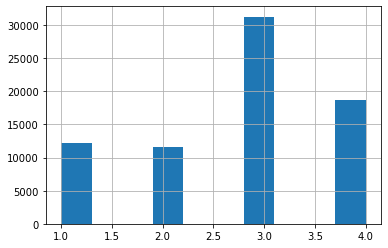

In [83]:
train.first_time.hist()
train.first_time.describe()

Выбросов нет.

##### Столбец foreign_passport.

In [84]:
train.foreign_passport.isna().value_counts()# Оценим количество пропусков.

False    73799
Name: foreign_passport, dtype: int64

Пропусков в этом столбце нет. Теперь построим boxplot для клиентов банка с загранпаспортами и без, и значением дефолта для каждой группы.

<AxesSubplot:xlabel='foreign_passport', ylabel='default'>

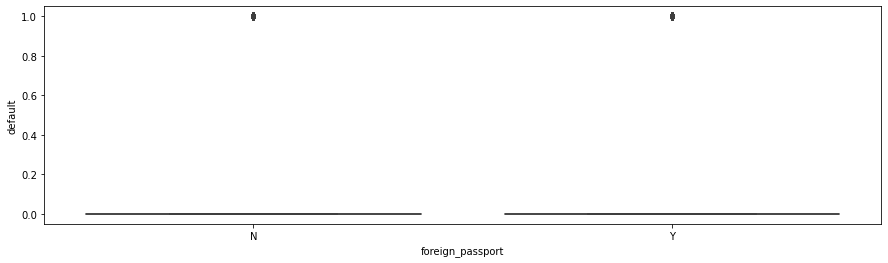

In [85]:
fig, axes = plt.subplots(1, 1, figsize = (15, 4))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = "foreign_passport", y = "default", data = train, showfliers = True )

Из получившихся боксплотов становится понятно, что случаи дефолта имели место как среди клиентов с загранпаспортами, так и среди клиентов без них. Проверим, есть ли статистическая разница в распределении случаев дефолта по этим двум группам клиентов, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения случаев дефолта по клиентам с загранпаспортами и без неразличимы:

In [86]:
for col in ['foreign_passport']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки foreign_passport


Раз есть статистически значимые различия в зависимости от наличия загранпаспорта, то берем этот признак в работу. А для удобства дальнейшей работы с ним присвоим бинарным значениям числовые.

In [87]:
# Создадим словарь foreign_passport_dict куда запишим цифровые коды, соответствующие Y (1) и N (0):
foreign_passport_dict = {"foreign_passport": {'Y': 1, 'N': 0}}# Создали словарь
train = train.replace(foreign_passport_dict)# Заменили в столбце foreign_passport ,бинарные значения числовыми.

In [88]:
train

,G,H,I,J,client_id,D,E,F,A,B,...,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,income,first_time,foreign_passport,default
0,0,0,0,1,25905,0,1,0,1,0,...,1,0,0,-2.008753,1,50,18000,1,0,0
1,0,0,0,1,63161,0,0,1,0,1,...,0,0,0,-1.532276,3,50,19000,1,0,0
2,1,0,0,0,25887,0,1,0,1,0,...,0,2,0,-1.408142,1,80,30000,4,1,0
3,1,0,0,0,16222,0,0,1,0,1,...,0,0,0,-2.057471,2,50,10000,3,0,0
4,1,0,0,0,101655,0,0,1,0,1,...,0,0,1,-1.244723,1,60,30000,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,0,0,0,1,54887,0,1,0,1,0,...,0,0,0,-1.792064,3,50,17000,4,0,0
73795,1,0,0,0,76821,0,1,0,0,1,...,1,0,0,-2.058029,1,50,70000,4,0,0
73796,0,1,0,0,103695,0,0,1,0,1,...,0,0,0,-1.512635,4,80,45000,2,0,0
73797,0,1,0,0,861,0,0,1,1,0,...,0,0,1,-1.479334,3,50,13000,3,0,1


### Корреляционный анализ.

Для числовых столбцов необходимо выполнить корреляционный анализ.

In [89]:
# числовые переменные и целевая переменная
num_cols = ['app_date', 'age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'region_rating', 'income', 'first_time', 'default' ]

In [90]:
train[num_cols].corr() # Выведем корреляционную матрицу.

,app_date,age,decline_app_cnt,score_bki,bki_request_cnt,region_rating,income,first_time,default
app_date,1.000000,-0.015676,0.021352,0.063605,0.029165,-0.007125,0.000454,-0.016932,0.039372
age,-0.015676,1.000000,-0.111175,-0.106275,0.046265,-0.089501,-0.018900,0.079046,-0.025004
decline_app_cnt,0.021352,-0.111175,1.000000,0.189987,0.155894,-0.038505,-0.021687,-0.069099,0.113682
score_bki,0.063605,-0.106275,0.189987,1.000000,0.156257,0.008959,-0.012639,-0.069122,0.175369
bki_request_cnt,0.029165,0.046265,0.155894,0.156257,1.000000,0.009025,0.082983,0.014859,0.078242
region_rating,-0.007125,-0.089501,-0.038505,0.008959,0.009025,1.000000,0.205674,0.088777,-0.089035
income,0.000454,-0.018900,-0.021687,-0.012639,0.082983,0.205674,1.000000,0.109893,-0.039752
first_time,-0.016932,0.079046,-0.069099,-0.069122,0.014859,0.088777,0.109893,1.000000,-0.105579
default,0.039372,-0.025004,0.113682,0.175369,0.078242,-0.089035,-0.039752,-0.105579,1.000000


<AxesSubplot:>

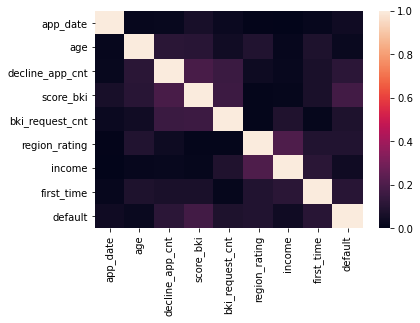

In [91]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1) # Выведем корреляционную матрицу в цвете

    Глядя на корреляционную матрицу видим, что наиболее сильное влияние на целевую переменную (default) оказывает скоринговый балл по данным из БКИ (score_bki).
    Так же сильно влияют на целевую переменную следующие параметры: количество отказанных прошлых заявок (decline_app_cnt) и давность наличия информации о заемщике (first_time).
    Заметна (хотя и не такая сильная) корреляция с целевой переменной параметров: количество запросов в БКИ (bki_request_cnt) и рейтинг региона (region_rating).
    Самая слабая корреляция с целевой переменной прослеживается у возраста заемщика (age), даты подачи заявки(app_date) и его дохода (income).
    Что касается корреляции числовых параметров меж собой, то заметна высокая корреляция скорингового балла по данным из БКИ (score_bki) с количеством отказанных прошлых заявок (decline_app_cnt) и количеством запросов в БКИ (bki_request_cnt). Перед запуском датасета в модель можно поэксперементировать с удалением удалить столбцов decline_app_cnt и bki_request_cnt, оставив только score_bki. Сравнить метрики ROC AUC с этими столбцами и без них. Если при удаленных столбцах метрика получится больше, то удалить их. Таким образом мы избавимся от всех обнаруженных ранее выбросов не удаляя строки (которые могут содержать полезную информацию). Если же при удаленных столбцах метрика получится меньше, то оставить их, но тогда придется заниматься выбросами.

### Оценка значимости категориальных параметров.

Для оценки значимости категориальных и бинарных переменных будем использовать функцию mutual_info_classif из библиотеки sklearn. Данная функция опирается на непараметрические методы, основанные на оценке энтропии в группах категориальных переменных.

In [92]:
# бинарные переменные
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
# категориальные переменные
cat_cols = ['education', 'home_address', 'work_address', 'sna']
cat_cols_dummy = ['ACD', 'PGR', 'GRD', 'UGR', 'SCH', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [93]:
train_initial.education = train_initial.education.fillna(0)# Заполним пропуски в столбце education нулями.
for i in range (0, len(train_initial)):
    if train_initial.education[i] == 0:
        if 1000<train_initial.income[i]<27500:
            train_initial.education[i] = 'SCH'
        elif 27501<train_initial.income[i]<35000:
            train_initial.education[i] = 'UGR'
        elif 35001<train_initial.income[i]<50000:
            train_initial.education[i] = 'GRD'
        else:
            train_initial.education[i] = 'PGR'
    else:
        train_initial.education[i] = train_initial.education[i]

<ipython-input-93-6deecd52fd7b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_initial.education[i] = train_initial.education[i]


In [94]:
# Создадим словарь education_dict куда запишим цифровые коды, соответствующие категориям. 
# ACD (4), PGR (3), GRD (2), UGR (1) и SCH (0):
education_dict = {"education": {'ACD': 4, 'PGR': 3, 'GRD': 2, 'UGR': 1, 'SCH': 0}}# Создали словарь
train_initial = train_initial.replace(education_dict)# Заменили в столбце education категориальные коды с целочисленных на буквенные.

In [95]:
train_initial['sex'] = train['sex']
train_initial['car'] = train['car']
train_initial['car_type'] = train['car_type']
train_initial['good_work'] = train['good_work']
train_initial['foreign_passport'] = train['foreign_passport']

<AxesSubplot:>

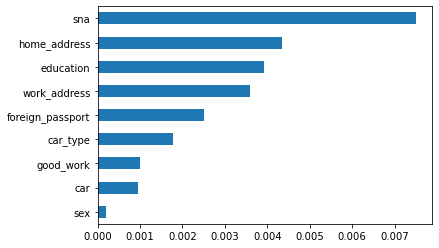

In [96]:
imp_cat = Series(mutual_info_classif(train_initial[bin_cols + cat_cols], train_initial['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

    Видно, что из категориальных переменных наибольшее влияние на целевую переменную оказывает связь заемщика с клиентами банка (sna).
    Параметры home_address, education и work_address так же оказывают сильное влияние.
    Заметно влияет на благонадежность заемщика наличие у него заграничного паспорта и машины иностранного производства.
    Некоторое влияние оказывает наличие хорошей работы и машины (без уточнения страны производителя), а наименьшее влияние оказывает пол заемщика.    

<AxesSubplot:>

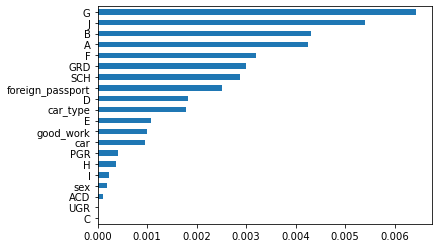

In [97]:
imp_cat = Series(mutual_info_classif(train[bin_cols + cat_cols_dummy], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols_dummy)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

### Стандартизация числовых переменных.

In [98]:
train_backup = train.copy() # Перед стандартизацией сохраним резервную копию датасета.

In [99]:
train = train_backup.copy() # Вытаскиваем из резервной копии нестандартизированный датасет (если нужно).

In [100]:
train['app_date_standart'] = 0
standartization(train.app_date)
train.app_date_standart = train.Standart
del train['Standart']
del train['app_date']

train['age_standart'] = 0
standartization(train.age)
train.age_standart = train.Standart
del train['Standart']
del train['age']

#train['score_bki_standart'] = 0
#standartization(train.score_bki)
#train.score_bki_standart = train.Standart
#del train['Standart']
#del train['score_bki']

#train['region_rating_standart'] = 0
#standartization(train.region_rating)
#train.region_rating_standart = train.Standart
#del train['Standart']
#del train['region_rating']

train['income_standart'] = 0
standartization(train.income)
train.income_standart = train.Standart
del train['Standart']
del train['income']

#train['first_time_standart'] = 0
#standartization(train.first_time)
#train.first_time_standart = train.Standart
#del train['Standart']
#del train['first_time']

#train['bki_request_cnt_standart'] = 0
#standartization(train.bki_request_cnt)
#train.bki_request_cnt_standart = train.Standart
#del train['Standart']
#del train['bki_request_cnt']

#train['decline_app_cnt_standart'] = 0
#standartization(train.decline_app_cnt)
#train.decline_app_cnt_standart = train.Standart
#del train['Standart']
#del train['decline_app_cnt']

In [101]:
train_standart_backup = train.copy()# Cохраним резервную копию датасета и после стандартизации.

Стандартизировать целевую переменную default у нас нет необходимости, так как она бинарная, со значениями 0 и 1. Так же путем перебора различных вариантов было установлено, что не все признаки есть смысл стандартизировать. Стандартизация признаков: дата подачи заявки (app_date), возраст заемщика (age) и доход заемщика (income) увеличивает точность прогноза (метрику ROC AUC). Но дальнейшая стандартизация снижает ее, поэтому мы ее проводить не будем. Если есть желание можете раскоментировать коды со стандартизацией других столбцов и посмотреть как это влияет на ROC-AUC метрику.

Удалим столбец client_id и запишем датасет без этого столбца в новую переменную.

In [102]:
train = train_standart_backup.copy() # Вытаскиваем резервную копию стандартизированного датасета.

In [103]:
train_model = train.drop(['client_id'], axis = 1)

In [104]:
train_model

,G,H,I,J,D,E,F,A,B,C,...,good_work,score_bki,bki_request_cnt,region_rating,first_time,foreign_passport,default,app_date_standart,age_standart,income_standart
0,0,0,0,1,0,1,0,1,0,0,...,0,-2.008753,1,50,1,0,0,0.003442,0.007260,-0.001842
1,0,0,0,1,0,0,1,0,1,0,...,0,-1.532276,3,50,1,0,0,-0.001027,0.006301,-0.001762
2,1,0,0,0,0,1,0,1,0,0,...,0,-1.408142,1,80,4,1,0,0.003442,-0.004563,-0.000885
3,1,0,0,0,0,0,1,0,1,0,...,0,-2.057471,2,50,3,0,0,0.004473,0.004384,-0.002480
4,1,0,0,0,0,0,1,0,1,0,...,1,-1.244723,1,60,4,1,0,-0.005267,0.002786,-0.000885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,0,0,0,1,0,1,0,1,0,0,...,0,-1.792064,3,50,4,0,0,-0.000111,0.001828,-0.001922
73795,1,0,0,0,0,1,0,0,1,0,...,0,-2.058029,1,50,4,0,0,-0.002402,0.000549,0.002304
73796,0,1,0,0,0,0,1,0,1,0,...,0,-1.512635,4,80,2,0,0,-0.005726,-0.002646,0.000311
73797,0,1,0,0,0,0,1,1,0,0,...,1,-1.479334,3,50,3,0,1,0.006651,-0.003285,-0.002241


In [105]:
#del train_model['C']
#del train_model['UGR']
#del train_model['ACD']
#del train_model['sex']
#del train_model['I']
#del train_model['H']
#del train_model['PGR']
#del train_model['car']
#del train_model['good_work']
#del train_model['E']
#del train_model['car_type']
#del train_model['D']
#del train_model['foreign_passport']
#del train_model['SCH']
#del train_model['GRD']
#del train_model['F']
#del train_model['A']
#del train_model['B']
#del train_model['J']
#del train_model['G']

Даже удаление наименее значимого столбца C приводит к снижению метрики ROC AUC.

In [106]:
# По результатам корреляционного анализа пробуем удалять столбцы decline_app_cnt и bki_request_cnt.
#del train_model['decline_app_cnt']
#del train_model['bki_request_cnt']

Попытки удаления этих двух столбцов показывают нам, что метрика ROC AUC при этом снижается, а нам необходимо ее повышать. Поэтому мы их оставим. Но тогда нам есть смысл попробовать увеличить метрику избавившись от выбросов содержащихся в этих столбцах.  

Рассмотрим столбец decline_app_cnt:

count    73799.000000
mean         0.275749
std          0.804272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: decline_app_cnt, dtype: float64

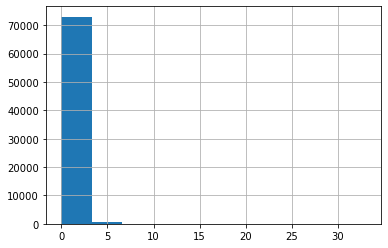

In [107]:
train_model.decline_app_cnt.hist()
train_model.decline_app_cnt.describe()

In [108]:
train_model.decline_app_cnt.value_counts()

0     61214
1      8397
2      2468
3       903
4       414
5       165
6       113
7        48
9        24
8        19
10       11
11        9
13        3
12        2
14        2
16        2
24        1
15        1
19        1
22        1
33        1
Name: decline_app_cnt, dtype: int64

Условимся считать выбросами все случаи больше 16 отклоненных заявок (4 строки статистики не сделают если мы их уберем).

In [109]:
# Удалим строки где значение decline_app_cnt больше 16-ти (всего должно получиться 4 строки)
#train_model = train_model[train_model.decline_app_cnt <= 16]

Рассмотрим столбец bki_request_cnt:

count    73799.000000
mean         2.000339
std          2.252073
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         53.000000
Name: bki_request_cnt, dtype: float64

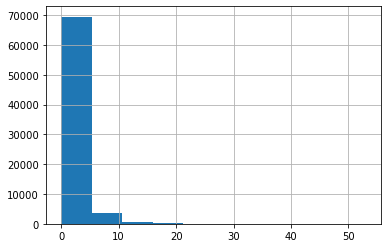

In [110]:
train_model.bki_request_cnt.hist()
train_model.bki_request_cnt.describe()

In [111]:
train_model.bki_request_cnt.value_counts()

0     19381
1     18276
2     13749
3      9187
4      5627
5      3268
6      1704
7       852
8       508
9       299
10      225
11      188
12      144
13       94
14       86
15       54
16       35
18       22
17       19
19       18
21       12
24       11
20        9
23        7
28        4
22        4
32        2
27        2
26        2
25        2
46        1
29        1
33        1
34        1
36        1
41        1
45        1
53        1
Name: bki_request_cnt, dtype: int64

Условимся считать выбросами все случаи больше 29 запросов в БКИ (8 строк статистики не сделают если мы их уберем).

In [112]:
# Удалим строки где значение bki_request_cnt больше 29-ти (всего должно получиться 8 строк) 
#train_model = train_model[train_model.decline_app_cnt <= 29]

Практические эксперименты с удалением выбросов показали, что метрика ROC AUC при этом снижается (вероятно при удалении строк удаляется ценная информация в других столбцах). Поэтому удалять выбросы мы не будем.

In [113]:
del train_model['app_date_standart'] # Убрав столбец app_date_standart повысили метрику ROC AUC
del train_model['age_standart'] # Убрав столбец age_standart повысили метрику ROC AUC 
#del train_model['score_bki']
#del train_model['region_rating']
del train_model['income_standart']# Убрав столбец income_standart повысили метрику ROC AUC 
#del train_model['first_time']

Примечательно, что в результате экспериментов с удалением столбцов и наблюдением получающейся метрики ROC AUC мы обнаружили, что именно те три столбца, которые ранее мы сочли целесообразным стандартизировать, на данном этапе целесообразно удалить. Таким образом, в будущем их можно удалять сразу, до стандартизации.

In [114]:
train_model

,G,H,I,J,D,E,F,A,B,C,...,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,first_time,foreign_passport,default
0,0,0,0,1,0,1,0,1,0,0,...,1,1,0,0,-2.008753,1,50,1,0,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,-1.532276,3,50,1,0,0
2,1,0,0,0,0,1,0,1,0,0,...,1,0,2,0,-1.408142,1,80,4,1,0
3,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,-2.057471,2,50,3,0,0
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,-1.244723,1,60,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,-1.792064,3,50,4,0,0
73795,1,0,0,0,0,1,0,0,1,0,...,1,1,0,0,-2.058029,1,50,4,0,0
73796,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,-1.512635,4,80,2,0,0
73797,0,1,0,0,0,0,1,1,0,0,...,0,0,0,1,-1.479334,3,50,3,0,1


### Создаём, обучаем и тестируем модель.

In [115]:
X = train_model.drop(['default'], axis = 1)

In [116]:
Y = train_model.default

In [117]:
# Разделим данные для обучения следующим образом:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [118]:
# Обучим модель на стандартных настройках логистической регрессии.
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\vsevo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

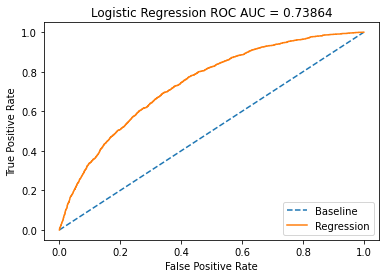

In [119]:
# Построим ROC (Receiver Operating Characteristic) кривую.
probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.5f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

### Используя гиперпараметры подберем оптимальные значения параметров логистической регрессии.

In [120]:
# найдем оптимальное значение параметра регуляризации для логистической регрессии. используем гиперпараметры

from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2', 'elasticnet', 'none']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Добавим возможные значения dual
dual = [True, False]

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty, dual=dual)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])
print('Лучшее dual:', best_model.best_estimator_.get_params()['dual'])

C:\Users\vsevo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vsevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vsevo\anaconda3\lib\site-packages\sklearn\linea

Лучшее Penalty: l2
Лучшее C: 2.7825594022071245
Лучшее dual: False


C:\Users\vsevo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
# Обучим модель на подобранных с помощью гиперпараметров настройках логистической регрессии.
improved_model = LogisticRegression(penalty='l2', C=2.7825594022071245, dual=False)
improved_model.fit(X_train, y_train)

C:\Users\vsevo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=2.7825594022071245)

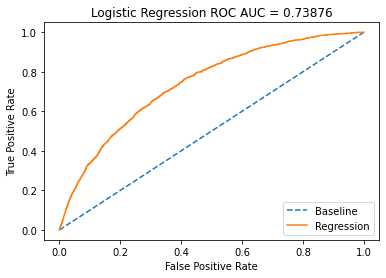

In [122]:
# Построим ROC (Receiver Operating Characteristic) кривую.
probs = improved_model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.5f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

Видим что когда мы обучали модель на стандартных настройках логистической регрессии, то метрика ROC AUC была 0.73864, а когда мы применили гиперпараметры, то получилось добиться более высокого значения метрики 0.73876. Таким образом для прогноза вероятности банкротства клиентов из датасета test мы будем применять модель с гиперпараметрами - improved_model.

### Прогноз вероятности банкротства для клиентов из датасета test.

In [123]:
test

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36344,83775,31MAR2014,SCH,F,37,N,N,1,0,-1.744976,3,50,2,3,15000,4,1,N
36345,106254,25APR2014,GRD,F,64,Y,Y,0,0,-2.293781,3,60,1,2,200000,1,4,N
36346,81852,30MAR2014,GRD,M,31,N,N,2,0,-0.940752,1,50,1,2,60000,4,2,N
36347,1971,07JAN2014,UGR,F,27,N,N,1,0,-1.242392,2,80,2,3,30000,1,1,N


Датасет тест представлен теми же столбцами что и датасет train, за исключением целевой переменной default (такого столбца попросту нет). Таким образом нам необходимо подготовить данные для запуска в модель таким же образом, как мы это сделали с датасетом train, после чего мы можем запускать датасет test в модель.

In [124]:
test_initial = test.copy() # Запомним изначальный датасет в test_initial

In [125]:
test = test_initial.copy() # Если требуется, есть возможность вернуться к изначальному датасету test.

### Выполним разведывательный анализ данных для оставщихся столбцов датасета test.

##### Столбец education.

In [126]:
test.education.isna().value_counts()# Оценим количество пропусков.

False    36178
True       171
Name: education, dtype: int64

Видим 171 пропущенное значение. Давайте рассмотрим признак подробнее:

SCH    19138
GRD    11403
UGR     4932
PGR      608
ACD       97
Name: education, dtype: int64

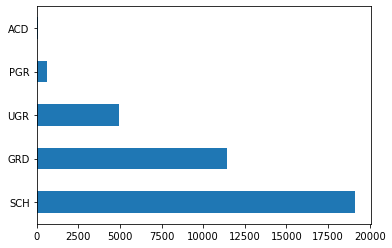

In [127]:
test['education'].value_counts().plot.barh()
test['education'].value_counts()

Видим, что в датасете test представлены те же уровни образования, что и в датасете train. Других нет. Так же есть 171 пропущенное значение. В датасете train было 307 пропусков. Мы их заполнили, проведя небольшое исследование корреляции образования человека с его доходом и установив приблизительную закономерность (подробности смотри выше в разведывательном анализе данных для датасета train). По такому же принципу заполним пропуски и здесь. 

In [128]:
test.education = test.education.fillna(0)# Заполним пропуски в столбце education нулями.
# А теперь заменим нули тем уровнем образования, что наиболее вероятен, если судить по доходу.
for i in range (0, len(test)):
    if test.education[i] == 0:
        if 1000<test.income[i]<27500:
            test.education[i] = 'SCH'
        elif 27501<test.income[i]<35000:
            test.education[i] = 'UGR'
        elif 35001<test.income[i]<50000:
            test.education[i] = 'GRD'
        else:
            test.education[i] = 'PGR'
    else:
        test.education[i] = test.education[i]

<ipython-input-128-077f6e9d4764>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.education[i] = test.education[i]
<ipython-input-128-077f6e9d4764>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.education[i] = 'SCH'
<ipython-input-128-077f6e9d4764>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.education[i] = 'PGR'
<ipython-input-128-077f6e9d4764>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy o

Для удобства дальнейшей работы с признаком выразим уровень образования клиентов через dummy-переменные с помощью метода get-dummies.

In [129]:
dummies_education  = pd.get_dummies(test.education)

dummies_education['client_id'] = test.client_id # создаем столбец client_id

# объединим датафрейм dummies_education с датафреймом test

test = dummies_education.merge(test, on = 'client_id', how = 'right')
del test['education']# Удаляем столбец education, так как образование клиента теперь выражено через dummy переменные. 

##### Столбец sex.

In [130]:
test.sex.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: sex, dtype: int64

Пропусков в этом столбце нет. Для удобства дальнейшей работы с этим признаком присвоим бинарным значениям числовые.

In [131]:
# Создадим словарь sex_dict куда запишим цифровые коды, соответствующие M (1) и F (0):
sex_dict = {"sex": {'M': 1, 'F': 0}}# Создали словарь
test = test.replace(sex_dict)# Заменили в столбце sex ,бинарные значения числовыми.

##### Столбец car.

In [132]:
test.car.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: car, dtype: int64

Пропусков в этом столбце нет. Для удобства дальнейшей работы с этим признаком присвоим бинарным значениям числовые.

In [133]:
# Создадим словарь car_dict куда запишим цифровые коды, соответствующие Y (1) и N (0):
car_dict = {"car": {'Y': 1, 'N': 0}}# Создали словарь
test = test.replace(car_dict)# Заменили в столбце car ,бинарные значения числовыми.

##### Столбец car_type.

In [134]:
test.car_type.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: car_type, dtype: int64

Пропусков в этом столбце нет. Для удобства дальнейшей работы с этим признаком присвоим бинарным значениям числовые.

In [135]:
# Создадим словарь car_type_dict куда запишим цифровые коды, соответствующие Y (1) и N (0):
car_type_dict = {"car_type": {'Y': 1, 'N': 0}}# Создали словарь
test = test.replace(car_type_dict)# Заменили в столбце car_type ,бинарные значения числовыми.

##### Столбец decline_app_cnt.

In [136]:
test.decline_app_cnt.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: decline_app_cnt, dtype: int64

Пропусков нет. Этот столбец числовой - посмотрим на его распределение.

count    73799.000000
mean         0.275749
std          0.804272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: decline_app_cnt, dtype: float64

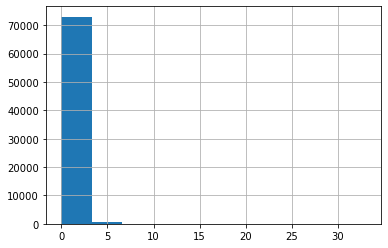

In [137]:
train.decline_app_cnt.hist()
train.decline_app_cnt.describe()

In [138]:
test.decline_app_cnt.value_counts()

0     30257
1      4103
2      1154
3       462
4       192
5        90
6        43
8        18
7        10
9         5
10        5
12        3
21        1
11        1
13        1
14        1
16        1
20        1
30        1
Name: decline_app_cnt, dtype: int64

Картина аналогичная распределению в датасете train. Когда я удалял там выбросы это снижало метрику ROC AUC, поэтому я отказался там от удаления выбросов. Не будем удалять их и здесь.

##### Столбец good_work.

In [139]:
test.good_work.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: good_work, dtype: int64

Пропусков в этом столбце нет. Менять бинарные значения на числовые не нужно, так как они уже записаны в числовом виде..

##### Столбец score_bki.

In [140]:
test. score_bki.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: score_bki, dtype: int64

Пропусков нет. Этот столбец числовой - посмотрим на его распределение.

count    36349.000000
mean        -1.904152
std          0.501764
min         -3.574197
25%         -2.261909
50%         -1.920823
75%         -1.563957
max          0.188820
Name: score_bki, dtype: float64

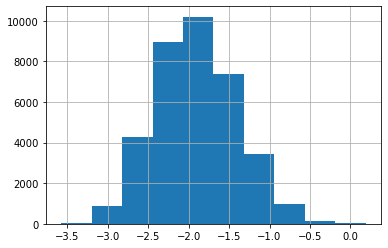

In [141]:
test.score_bki.hist()
test.score_bki.describe()

Выбросов нет. Распределен нормально.

##### Столбец bki_request_cnt.

In [142]:
test.bki_request_cnt.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: bki_request_cnt, dtype: int64

Пропусков нет. Этот столбец числовой - посмотрим на его распределение.

count    36349.000000
mean         2.014471
std          2.296789
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         47.000000
Name: bki_request_cnt, dtype: float64

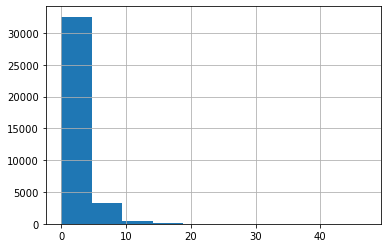

In [143]:
test.bki_request_cnt.hist()
test.bki_request_cnt.describe()

In [144]:
test.bki_request_cnt.value_counts()

0     9527
1     9019
2     6732
3     4483
4     2779
5     1692
6      796
7      440
8      227
9      160
10     125
11      90
12      73
13      57
15      27
14      24
16      23
17      14
19      12
18      10
21       7
20       5
23       5
22       4
25       3
27       3
32       2
26       2
29       2
40       2
24       1
33       1
28       1
47       1
Name: bki_request_cnt, dtype: int64

Картина аналогичная распределению в датасете train. Когда я удалял там выбросы это снижало метрику ROC AUC, поэтому я отказался там от удаления выбросов. Не будем удалять их и здесь.

##### Столбец region_rating

In [145]:
test.region_rating.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: region_rating, dtype: int64

Пропусков нет. Этот столбец числовой - посмотрим на его распределение.

count    36349.000000
mean        56.802938
std         13.086646
min         20.000000
25%         50.000000
50%         50.000000
75%         60.000000
max         80.000000
Name: region_rating, dtype: float64

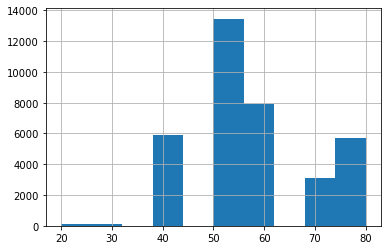

In [146]:
test.region_rating.hist()
test.region_rating.describe()

Выбросов нет. При этом очевидно распределение клиентов по четырем группам регионов с разным рейтингом.

##### Столбец home_address

In [147]:
test.home_address.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: home_address, dtype: int64

Пропусков нет.

In [148]:
test.home_address.value_counts()

2    19635
1    16103
3      611
Name: home_address, dtype: int64

Несмотря на то что значения home_address даны в целочисленном виде (1, 2, 3), по факту это категоризаторы домашнего адреса, то есть значения не целочисленные, а категориальные. Разумно выразить их через dummy-переменные. Но поскольку категории home_addres (1, 2, 3) совпадают с категориями work_address, то чтобы у нас не получилось столбцов с одинаковыми именами, разумно эти категории переименовать (например в А, В, С) перед тем как выразить их через dummy-переменные.

In [149]:
# Создадим словарь home_address_dict куда запишим буквы, соответствующие категориям. 3 (C), 2 (B) и 1 (A):
home_address_dict = {"home_address": {3: 'C', 2: 'B', 1: 'A'}}# Создали словарь
test = test.replace(home_address_dict)# Заменили в столбце home_address категориальные коды с целочисленных на буквенные.

In [150]:
dummies_home_address  = pd.get_dummies(test.home_address)

dummies_home_address['client_id'] = test.client_id # создаем столбец client_id

# объединим датафрейм dummies_home_address с датафреймом test

test = dummies_home_address.merge(test, on = 'client_id', how = 'right')
del test['home_address']# Удаляем столбец home_address, так как категории теперь выражены через dummy переменные. 

##### Столбец work_address.

In [151]:
test.work_address.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: work_address, dtype: int64

Пропусков нет.

In [152]:
test.work_address.value_counts()

3    22154
2    10255
1     3940
Name: work_address, dtype: int64

Несмотря на то что значения work_address даны в целочисленном виде (1, 2, 3), по факту это категоризаторы рабочего адреса, то есть значения не целочисленные, а категориальные. Разумно выразить их через dummy-переменные.Так же как и в столбце home_address переименуем эти категории (например в D, E, F) перед тем как выразить их через dummy-переменные.

In [153]:
# Создадим словарь work_address_dict куда запишим буквы, соответствующие категориям. 3 (F), 2 (E) и 1 (D):
work_address_dict = {"work_address": {3: 'F', 2: 'E', 1: 'D'}}# Создали словарь
test = test.replace(work_address_dict)# Заменили в столбце work_address категориальные коды с целочисленных на буквенные.

In [154]:
dummies_work_address  = pd.get_dummies(test.work_address)

dummies_work_address['client_id'] = test.client_id # создаем столбец client_id

# объединим датафрейм dummies_work_address с датафреймом test

test = dummies_work_address.merge(test, on = 'client_id', how = 'right')
del test['work_address']# Удаляем столбец work_address, так как категории теперь выражены через dummy переменные. 

##### Столбец sna (связь заемщика с клиентами банка - категориальный признак).

In [155]:
test.sna.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: sna, dtype: int64

Пропусков нет.

In [156]:
test.sna.value_counts()

1    23380
4     5732
2     5206
3     2031
Name: sna, dtype: int64

Несмотря на то что значения sna даны в целочисленном виде (1, 2, 3, 4), по факту это категоризаторы связи заемщика с клиентами банка, то есть значения не целочисленные, а категориальные. Разумно выразить их через dummy-переменные.Так же как и в столбце home_address переименуем эти категории (например в G, H, I, J) перед тем как выразить их через dummy-переменные.

In [157]:
# Создадим словарь sna_dict куда запишим буквы, соответствующие категориям. 4 (J), 3 (I), 2 (H) и 1 (G):
sna_dict = {"sna": {4: 'J', 3: 'I', 2: 'H', 1: 'G'}}# Создали словарь
test = test.replace(sna_dict)# Заменили в столбце sna категориальные коды с целочисленных на буквенные.

In [158]:
dummies_sna  = pd.get_dummies(test.sna)

dummies_sna['client_id'] = test.client_id # создаем столбец client_id

# объединим датафрейм dummies_sna с датафреймом test

test = dummies_sna.merge(test, on = 'client_id', how = 'right')
del test['sna']# Удаляем столбец sna, так как категории теперь выражены через dummy переменные. 

##### Столбец first_time (давность наличия информации о заемщике - целочисленный признак).

In [159]:
test.first_time.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: first_time, dtype: int64

Пропусков нет. Этот столбец числовой - посмотрим на его распределение.

count    36349.000000
mean         2.765798
std          1.011560
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: first_time, dtype: float64

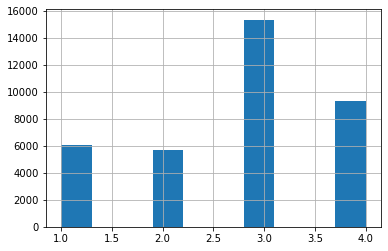

In [160]:
test.first_time.hist()
test.first_time.describe()

##### Выбросов нет.

##### Столбец foreign_passport.

In [161]:
test.foreign_passport.isna().value_counts()# Оценим количество пропусков.

False    36349
Name: foreign_passport, dtype: int64

Пропусков в этом столбце нет. Для удобства дальнейшей работы с этим признаком присвоим бинарным значениям числовые.

In [162]:
# Создадим словарь foreign_passport_dict куда запишим цифровые коды, соответствующие Y (1) и N (0):
foreign_passport_dict = {"foreign_passport": {'Y': 1, 'N': 0}}# Создали словарь
test = test.replace(foreign_passport_dict)# Заменили в столбце foreign_passport ,бинарные значения числовыми.

##### Столбцы app_date, age и income.

По результатам экспериментов с датасетом train максимального значения метрика ROC AUC достигла при стандартизации только этих трех столбцов. Потом попробовав их удалить обнаружили, что метрика стала еще больше. Таким образом здесь мы можем их не стандартизируя удалять сразу.

In [163]:
# По результатам экспериментов с датасетом train мы не брали в работу столбцы app_date, age и income.
del test['app_date']
del test['age']
del test['income']

In [164]:
test_backup = test.copy() # Сохраняем резервную копию датасета test, подготовленную для запуска в модель.

In [165]:
test = test_backup.copy()

In [166]:
test_model = test.drop(['client_id'], axis = 1)
probs = improved_model.predict_proba(test_model)
probs = probs[:,1]

In [167]:
submission = test
submission['default_probability'] = 0.0

In [168]:
del submission['G']
del submission['H']
del submission['I']
del submission['J']
del submission['D']
del submission['E']
del submission['F']
del submission['A']
del submission['B']
del submission['C']
del submission['ACD']
del submission['GRD']
del submission['PGR']
del submission['SCH']
del submission['UGR']
del submission['sex']
del submission['car']
del submission['car_type']
del submission['decline_app_cnt']
del submission['good_work']
del submission['score_bki']
del submission['bki_request_cnt']
del submission['region_rating']
del submission['first_time']
del submission['foreign_passport']

In [169]:
for i in range (0, len(submission)):
    submission.default_probability[i] = probs[i]

<ipython-input-169-410d2895fc69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.default_probability[i] = probs[i]


In [170]:
submission

,client_id,default_probability
0,74835,0.043350
1,17527,0.323485
2,75683,0.065825
3,26883,0.092041
4,28862,0.028343
...,...,...
36344,83775,0.317743
36345,106254,0.025612
36346,81852,0.324256
36347,1971,0.161562


In [172]:
#Сортируем клиентов в порядке возрастания вероятности дефолта.
sorted_submission = submission.sort_values(by = 'default_probability')

In [173]:
sorted_submission

,client_id,default_probability
28713,28080,0.004468
22150,64820,0.004629
19674,52145,0.004720
35805,59374,0.005026
30914,59481,0.005572
...,...,...
17882,52895,0.929359
29421,16424,0.937754
15537,51334,0.941962
32007,79938,0.956177


In [174]:
#Записываем получившийся результат в файл sorted_submission.csv
sorted_submission.to_csv('D:\Data Scientist_Skill Factory\Folders with data/Unit_5/Project/From_kaggle/sorted_submission.csv', index = False)